# P2 Computational Vision

**Important:** Read the file `README.md` before start coding.


<div class = "alert alert-info" style = "border-radius:10px;border-width:3px;border-color:darkblue;font-family:Verdana,sans-serif;font-size:16px;">

**Delivery**
<ol>

Requirements to fulfill:
<ul>
    <li>  Answer the questions introduced in the exercises.    
    <li>  The implemented code should be,<br>
        - free of errors (Run All before delivery and check for possible errors)<br>
        - optimized ( e.g. do not use 'for' instruction when indexing numpy arrays)<br>
        - readable  ( e.g. avoiding the implementation of more than 2 loops within a line)<br>
        - commented and with descriptions        
    <li> The deliverable must be a file named P2_Student1_Student2.zip that includes:
    <ul>
        <li> The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
         <li> All the images used in this notebook.
    </ul>

</ul>

 **Deadline (Campus Virtual): October 14th, 23:00 h** 


</ol>
</div>


## Practicum 2: Filtering and edge detection



The main topics are:
1. Image smoothing and convolution
2. Edge detection 

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.


### Image smoothing and convolution

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from skimage import exposure
from skimage import img_as_float, img_as_uint
from skimage import transform as tf
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage.filters import gaussian, median, roberts, prewitt, sobel
from skimage.feature import canny

from scipy.ndimage import convolve

In [2]:
%matplotlib inline

### 2.1 Histogram visualization

**Exercise 2.1**: 

a) 
- Read the image "peppers.png" from folder 'images'
- Visualize the histogram of the gray image

    To plot the histogram follow the following instructions:
    - Convert the image to grayscale with the function `color.rgb2gray()` of the package `skimage`.
    - Use the `exposure` module within the `skimage` library, which makes the histogram extraction easy.
    - Use `bar` of `matplotlib` to visualize the histogram.
    - Obtain the histogram with 8 and 32 bins. 
    - Use the values at the center of the bins to set the ticks labels as the gray value in the range [0-255].
    
    
- What is the histogram representing for an image? 
 

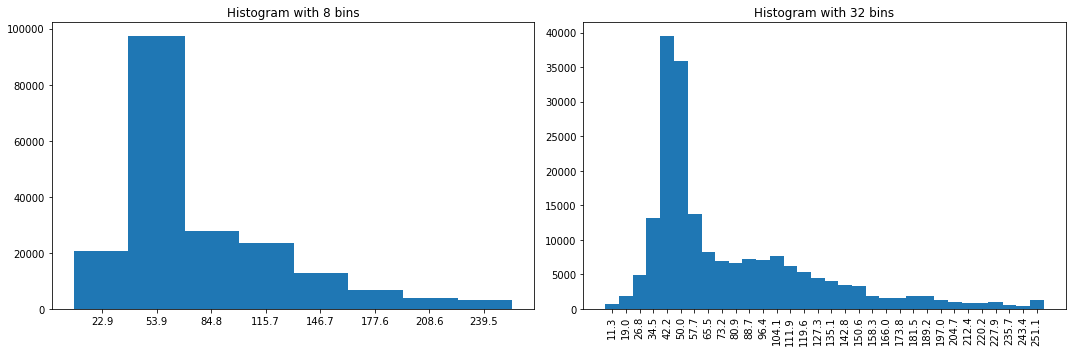

In [3]:
peppers = io.imread('images/peppers.png')
gs_peppers = rgb2gray(peppers)

f, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.xticks(rotation=90)

# 8 bins i.e. 8 groups of intensities (0-31, 32-63...)
hist_8, bins_8 = exposure.histogram(gs_peppers, nbins=8)
ax[0].set_title('Histogram with 8 bins')
ax[0].bar(bins_8 * 255, hist_8, width=256/8)
ax[0].set_xticks(ticks=bins_8 * 255)

# 32 bins i.e. 32 groups of intensities (0-7, 8-15...)
hist_32, bins_32 = exposure.histogram(gs_peppers, nbins=32)
ax[1].set_title('Histogram with 32 bins')
ax[1].bar(bins_32 * 255, hist_32, width=256/32)
ax[1].set_xticks(ticks=bins_32 * 255)

plt.tight_layout()
plt.show()

<div class = "alert alert-info" style = "background-color:Wheat;border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**Answer**

The histogram represents the occurences of grayscale pixel values in an image into n bins of the same width, the occurences of each intensity of a certain value (or in a certain range, if grouped in bins).

In the histogram we lose much information from the original image, since we discard relative positions and we can extract how many pixels there are for each intensity value (or bin), but we can't know where they were located in the original image.

However we get a summarized, global idea of the image, and we can still get sime insights (eg. infer image quality from whether the histogram is equalized).

</div>

b) Given a color image (im), what is the difference between ***1*** and ***2*** ?
   
*** 1. ***

im_2=np.array(im, dtype='float')


*** 2. ***

im_2=np.array(im)

im_2=img_as_float(im_2)

<div class = "alert alert-info" style = "background-color:Wheat;border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**Answer**

Values in float images must be within the range [0, 1], while int ones are in range [0, 255].

<ol>
 
<li>The first one loads integers but is read as floats, so every pixel is a float multiple of 1.0,
having the maximum value and being white if all channels have some value or a yellow tone if blue is missing, so the image is not loaded properly because the values are still in the [0,255] range.</li>

<li>The second one is explicitly converted to floats, so the range is transformed automatically to [0,1] and the image is loaded properly.</li>

</ol>

</div>

### 2.2 Grayscale and RGB images filtering (convolutions)

**Exercise 2.2:**
    
a) Read the image `peppers.png` and apply each of the following steps:

1. Convert it to grayscale with the function `color.rgb2gray()` of the package `skimage`.
2. Convolve it with a horizontal mask `mask_h1d=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]` using the function `ndimage.convolve()` of the package `scipy`.
3. Convolve the original image (1) with a transposed version of the mask in (2).
4. Convolve the original image (1) with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

Visualize the output of each step (1 to 4) in a single figure with short titles on each image to make them understandable.

Note: The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

Note: Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).



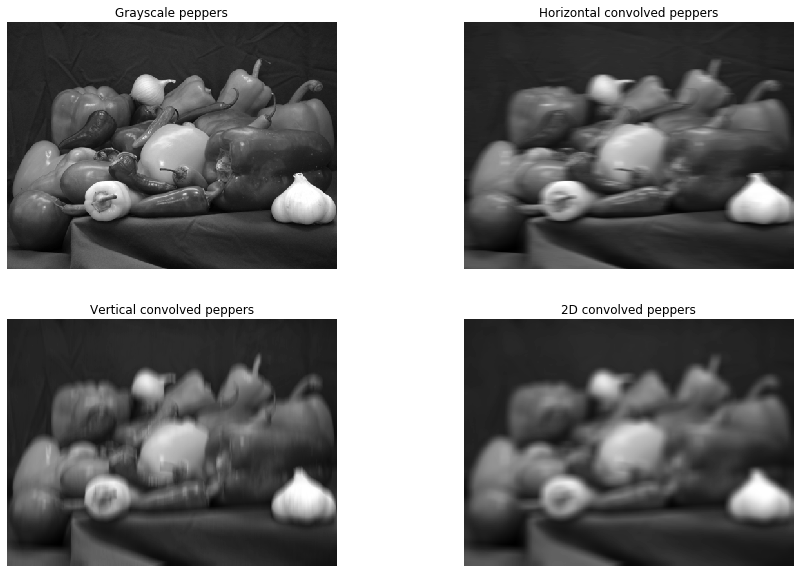

In [4]:
peppers = io.imread('images/peppers.png')

# Convert to grayscale image
gs_peppers = rgb2gray(peppers)

# Convolve with a mask of size 1x15 normalized with each value as 1/15
mask_h1d = np.ones(shape=(1, 15)) / 15
conv_peppers = convolve(gs_peppers, mask_h1d)

# Convolve the original image transposing the previous mask to have size 15x1
conv_t_peppers = convolve(gs_peppers, mask_h1d.T) # .T transposes a numpy array

# Convolve with a 2D mask of size 15x15 normalized with values 1/(15*15)
mask_m2d = np.ones(shape=(15, 15)) / 225
conv_2d_peppers = convolve(gs_peppers, mask_m2d)

f, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0][0].set_title('Grayscale peppers')
ax[0][0].imshow(gs_peppers, cmap='gray')
ax[0][0].axis('off')

ax[0][1].set_title('Horizontal convolved peppers')
ax[0][1].imshow(conv_peppers, cmap='gray')
ax[0][1].axis('off')

ax[1][0].set_title('Vertical convolved peppers')
ax[1][0].imshow(conv_t_peppers, cmap='gray')
ax[1][0].axis('off')

ax[1][1].set_title('2D convolved peppers')
ax[1][1].imshow(conv_2d_peppers, cmap='gray')
ax[1][1].axis('off')

plt.show()

<div class = "alert alert-info" style = "background-color:Wheat;border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

The efects of the convolutions with the different masks are easily noticeable.

The horizontally and vertically convolved peppers seem to be blurred along the horizontal and vertical axis respectively, while the 2D convolved peppers actually seem to be blurred along both axes.

</div>

b) In order to convolve an RGB image, each of the channels must be convolved separately.

Show the result obtained when applying a single-channel filter channel by channel separately on `pappers.png` with a 15x15 uniform mask. 

Note: Use the provided method `convolve_RGB_image`.

Note: Use `img_as_float` before the convolutions and for the final image.

In [5]:
# Provided method

# convolve_RGB_image(image to convolve, 
# the mask for the convolution
# image to save the results
def convolve_RGB_image (image, mask, image_convolved):
    image_convolved[:,:,0] = convolve(img_as_float(image[:,:,0]), mask)
    image_convolved[:,:,1] = convolve(img_as_float(image[:,:,1]), mask)
    image_convolved[:,:,2] = convolve(img_as_float(image[:,:,2]), mask)

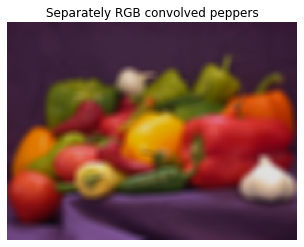

In [6]:
# Create the placeholder for the peppers of the same size as the source image.
conv_rgb_peppers = np.zeros_like(peppers)

# Notice that DON'T explicitly normalize the mask because with img_as_float it's already in [0, 1].
mask_m2d = np.ones(shape=(15, 15))

convolve_RGB_image(peppers, mask_m2d, conv_rgb_peppers)

plt.title('Separately RGB convolved peppers')
plt.imshow(conv_rgb_peppers)
plt.axis('off')
plt.show()

### 2.3 Effect of image scale on convolutions

**Exercise 2.3.**

a) Resize the image 'peppers.png' and observe the variations in the histograms.

1. Reduce it 10 times
2. Augment it 10 times. 
3. Observe if the histogram (i.e. nbins = 32) of the new images changed, and comment what happens and why.

Note: Use the command `resize` to change the size of the images.

Note: Use the provided method `create_RGB_histogram_figure` to show the RGB histogram.


In [7]:
# Provided method

# create_histogram_figure(image to create the histogram, 
# 'true' to show the gray image bar,
# number of bins for the histogram, 
# title for the figure)
def create_RGB_histogram_figure(image, bins, gray, title):
    
    histogram_red, bins_red = exposure.histogram(img_as_float(image[:,:,0]), nbins=bins) 
    histogram_green, bins_green = exposure.histogram(img_as_float(image[:,:,1]), nbins=bins)
    histogram_blue, bins_blue = exposure.histogram(img_as_float(image[:,:,2]), nbins=bins)

    fig = plt.figure(figsize=(12,3)) 
    index = np.arange(len(bins_red))
    bar_width = 0.2
    opacity = 0.8

    rects1 = plt.bar(index, histogram_red, bar_width,
                     alpha=opacity,
                     color='r',
                     label='Red')

    rects2 = plt.bar(index + bar_width, histogram_green, bar_width,
                     alpha=opacity,
                     color='g',
                     label='Green')

    rects3 = plt.bar(index + bar_width*2, histogram_blue, bar_width,
                     alpha=opacity,
                     color='b',
                     label='Blue')
    
    if gray == True: # it will show the gray image bar
        histogram_gray, bins_gray = exposure.histogram(rgb2gray(image), nbins=bins)
        rects4 = plt.bar(index + bar_width*3, histogram_gray, bar_width,
                         alpha=opacity,
                         color='y',
                         label='Gray')

    # Other propierties of the histogram
    plt.title(title)
    plt.xticks(index + bar_width, range(len(bins_red)))
    plt.legend()

    plt.tight_layout()
    plt.show()

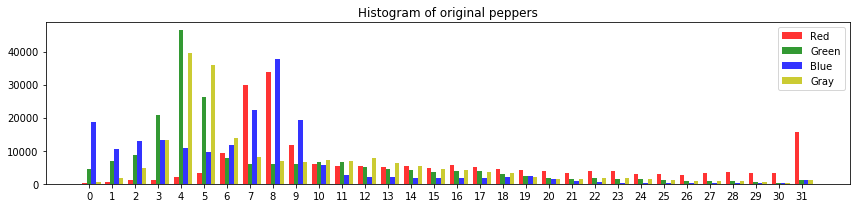

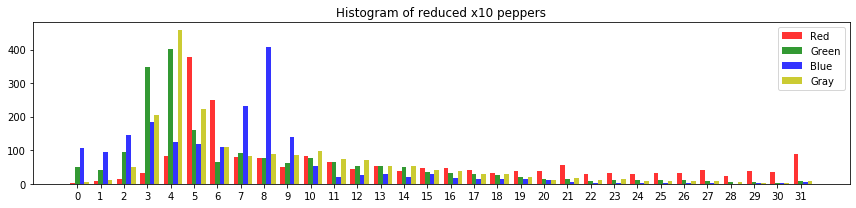

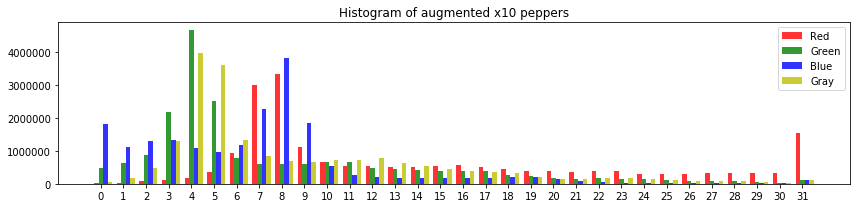

In [8]:
peppers_red_10 = tf.resize(peppers, (peppers.shape[0] // 10, peppers.shape[1] // 10, 3))
peppers_aug_10 = tf.resize(peppers, (peppers.shape[0] * 10, peppers.shape[1] * 10, 3))

create_RGB_histogram_figure(peppers, bins=32, gray=True, title='Histogram of original peppers')
create_RGB_histogram_figure(peppers_red_10, bins=32, gray=True, title='Histogram of reduced x10 peppers')
create_RGB_histogram_figure(peppers_aug_10, bins=32, gray=True, title='Histogram of augmented x10 peppers')

<div class = "alert alert-info" style = "background-color:Wheat;border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**Changes and interpretation**

*First of all, before comparing histograms of images of different sizes, we should normalize them
because bigger images will obviously have more occurences. However, in this case we know that it's just
a factor of 10 that we are aware of, and we are only keen on the shapes of the histograms. So, we are looking
at relative frequencies and their distribution, not absolute values.*

* *Scaling up* the image, the histogram shape/distribution remains equal because we are just adding pixels. Instead of having a given pixel of a certain colour, in the new image we will havbe the same pixel 10 times.


* On the other hand, if *scaling down* the image, the distribution changes a bit, because some pixels will necessarily be removed, and the original distribution will not exactly be respected. For instance, if we have a 2x2 area with 1 pixel of colour C1 and 3 pixels of colour C2, and we scale down the image such that the area scales down to only one pixel, the pixel of colour C1 will probably be discarded and we will have just a pixel of colour C2. It depends on the particular configuration, such as the interpolation system.

</div>

**Exercise 2.3.**

b) Apply a convolution (15x15 uniform mask) on the resized images and visually compare the results.

1. Convolve the original image.
2. Convolve the image reduced 10 times.
3. Convolve the image augmented 10 times.

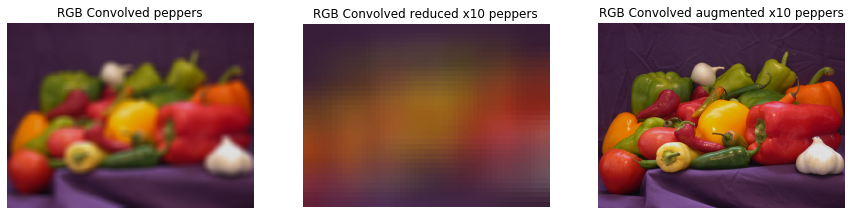

In [10]:
mask_m2d = np.ones(shape=(15, 15))

# Convove the original image
conv_rgb_peppers = np.zeros_like(peppers)
convolve_RGB_image(peppers, mask_m2d, conv_rgb_peppers)

# Convove a x10 reduced image
peppers_red_10 = tf.resize(peppers, (peppers.shape[0] // 10, peppers.shape[1] // 10, 3))
conv_rgb_peppers_red_10 = np.zeros_like(peppers_red_10, dtype=np.uint8)
convolve_RGB_image(peppers_red_10, mask_m2d, conv_rgb_peppers_red_10)

# Convove a x10 augmented image
peppers_aug_10 = tf.resize(peppers, (peppers.shape[0] * 10, peppers.shape[1] * 10, 3))
conv_rgb_peppers_aug_10 = np.zeros_like(peppers_aug_10, dtype=np.uint8)
convolve_RGB_image(peppers_aug_10, mask_m2d, conv_rgb_peppers_aug_10)

f, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title('RGB Convolved peppers')
ax[0].imshow(conv_rgb_peppers)
ax[0].axis('off')

ax[1].set_title('RGB Convolved reduced x10 peppers')
ax[1].imshow(conv_rgb_peppers_red_10)
ax[1].axis('off')

ax[2].set_title('RGB Convolved augmented x10 peppers')
ax[2].imshow(conv_rgb_peppers_aug_10)
ax[2].axis('off')

plt.show()

<div class = "alert alert-info" style = "background-color:Wheat;border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
    
The results are as obvious as we could expect. We already commented the original image in previous sections.

Convolving the reduced image with a *15x15 mask* would be similar to use a *150x150 mask* to the original image, as each *10x10 region* of pixels are represented as *1* in this image. Hence, the image is so blurred, as the mask covers quite a big area.

Convolving the augmented image produces the opposite effect, each pixel of the original image is now a *10x10 region*, so applying a *15x15 mask* is almost like convolving with a mask with less than two pixels from the original image, giving a light blur effect, with no observable changes at first sight.
    
</div>

### 2.4 Image processing with weighting and non-linear filters

**Exercise 2.4**: 

a) Generate the following kernels and apply them to the `peppers.png`:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

Note: Use the [skimage.filters functions](https://scikit-image.org/docs/dev/api/skimage.filters.html) for creating the different filters.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


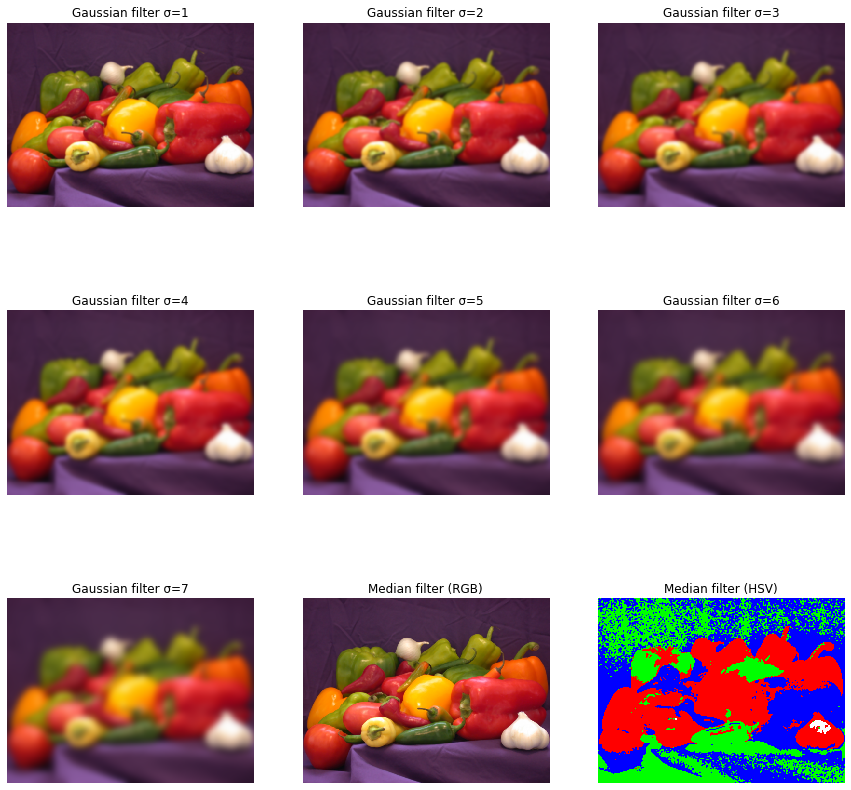

In [34]:
f, ax = plt.subplots(3, 3, figsize=(15, 15))

for i in range(7):
    gaussian_peppers = gaussian(peppers, sigma=i + 1)
    ax[i // 3][i % 3].set_title(f'Gaussian filter σ={i+1}')
    ax[i // 3][i % 3].imshow(gaussian_peppers)
    ax[i // 3][i % 3].axis('off')

# Apply channel-level median filter in RGB (std) space
median_peppers = peppers.copy()
median_peppers[:, :, 0] = median(median_peppers[:, :, 0])
median_peppers[:, :, 1] = median(median_peppers[:, :, 1])
median_peppers[:, :, 2] = median(median_peppers[:, :, 2])

ax[2][1].set_title('Median filter (RGB)')
ax[2][1].imshow(median_peppers)
ax[2][1].axis('off')

# Apply channel-level median filter in HSV (using conversions) space
median_peppers = rgb2hsv(peppers)
median_peppers[:, :, 0] = median(median_peppers[:, :, 0])
median_peppers[:, :, 1] = median(median_peppers[:, :, 1])
median_peppers[:, :, 2] = median(median_peppers[:, :, 2])
median_peppers = hsv2rgb(median_peppers)

ax[2][2].set_title('Median filter (HSV)')
ax[2][2].imshow(median_peppers)
ax[2][2].axis('off')

plt.show()

<div class = "alert alert-info" style = "background-color:Wheat;border-radius:10px;border-width:3px;border-color:green;font-family:Verdana,sans-serif;font-size:16px;">

**Answer**

Values in float images must be within the range [0, 1], while int ones are in range [0, 255].

<ul>
 
<li>The *Gaussian filter* is a low pass filter, which is convenient for smoothing or blurring images (since errors are high-frequency). Hence, the peppers are blurred are the images.</li>

<li>In our case, we have increased sigma. The greater the sigma, the more smoothing.</li>

<li>The *Median filter*, which is a non-linear filter, does not smooth so much the image. Instead, it can be used to remove salt&pepper noise from images, because it takes the median value of a region, so extreme values are filtered out.</li>

</ul>

**Note**: The median filter must be applied to 2D images, so there are 2 options for noise filtering with median filter:

<ol>

<li>Apply median filter for each RGB channel separately, and combine again together, which is not the best choice, as the three components are correlated, and false colors may appear.</li>

<li>A better solution (<a href="https://link.springer.com/chapter/10.1007%2F978-3-642-13208-7_4#page-1">reference</a>) involves converting the color space from RGB to HSV and then do the median filter on each channel separately (hue, saturation and value), then convert back to RGB.

</div>

### Edge detection

### 2.5 Determine the optimal contour 

a) Load the 'starbuck.jpg' image and visualize its contours.	

Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Roberts.
2. Prewitt
3. Sobel
4. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Q1: Which is the best countour detection technique? 

- Q2: Which are the optimal canny parameters for this image? (use sigma = 1, 3 and 5).


**Note**: Use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

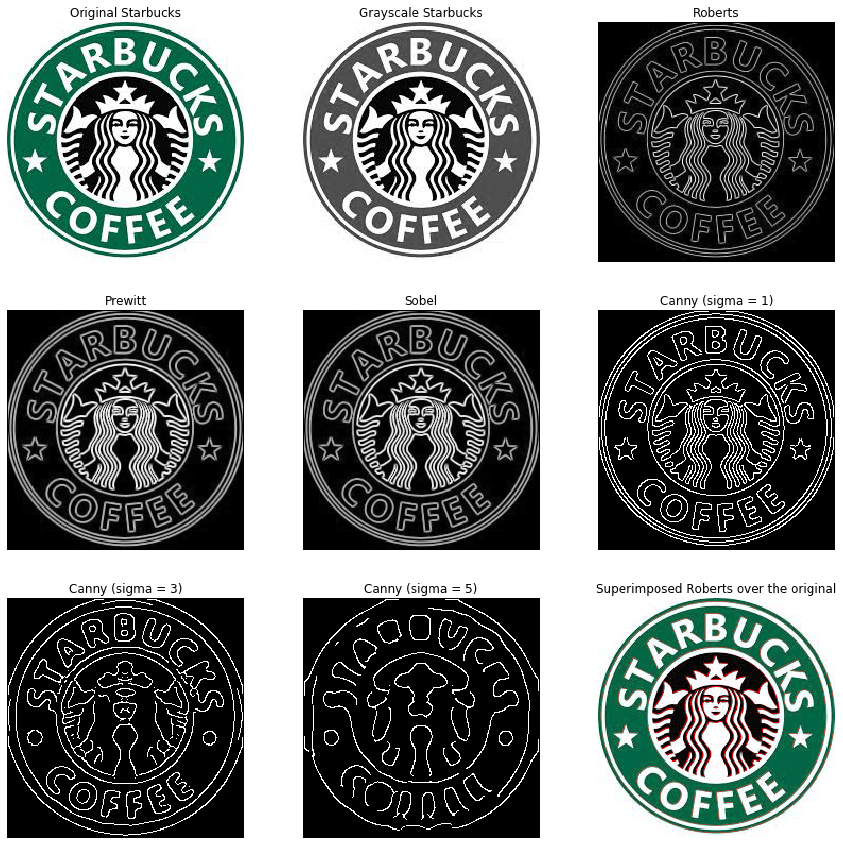

In [76]:
starbuck = io.imread('images/starbuck.jpg')
gs_starbuck = rgb2gray(starbuck)

f, ax = plt.subplots(3, 3, figsize=(15, 15))

ax[0][0].set_title('Original Starbucks')
ax[0][0].imshow(starbuck)
ax[0][0].axis('off')

ax[0][1].set_title('Grayscale Starbucks')
ax[0][1].imshow(gs_starbuck, cmap='gray')
ax[0][1].axis('off')

sb_roberts = roberts(gs_starbuck)
ax[0][2].set_title('Roberts')
ax[0][2].imshow(sb_roberts, cmap='gray')
ax[0][2].axis('off')

sb_prewitt = prewitt(gs_starbuck)
ax[1][0].set_title('Prewitt')
ax[1][0].imshow(sb_prewitt, cmap='gray')
ax[1][0].axis('off')

sb_sobel = sobel(gs_starbuck)
ax[1][1].set_title('Sobel')
ax[1][1].imshow(sb_sobel, cmap='gray')
ax[1][1].axis('off')

sb_canny_1 = canny(gs_starbuck, sigma=1)
ax[1][2].set_title('Canny (sigma = 1)')
ax[1][2].imshow(sb_canny_1, cmap='gray')
ax[1][2].axis('off')

sb_canny_3 = canny(gs_starbuck, sigma=3)
ax[2][0].set_title('Canny (sigma = 3)')
ax[2][0].imshow(sb_canny_3, cmap='gray')
ax[2][0].axis('off')

sb_canny_5 = canny(gs_starbuck, sigma=5)
ax[2][1].set_title('Canny (sigma = 5)')
ax[2][1].imshow(sb_canny_5, cmap='gray')
ax[2][1].axis('off')

# We superimose the edges in red to get a better visualization
red_lines = np.zeros(shape=(starbuck.shape[0], starbuck.shape[1], 3), dtype=np.uint8)
red_lines[:, :, 0] = sb_roberts * 255
superimposed = np.maximum(starbuck, red_lines)
ax[2][2].set_title('Superimposed Roberts over the original')
ax[2][2].imshow(superimposed, cmap='gray')
ax[2][2].axis('off')

plt.show()

<div class = "alert alert-info" style = "background-color:Wheat;border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

TODO

</div>

b)	(Optional): Repeat the experiment with other images, you can use the ones included in the folder `images`. Comment if some parameter needs to be changed for the different images.

#### **Question**

- Which are the limitations of the different images contour extraction?

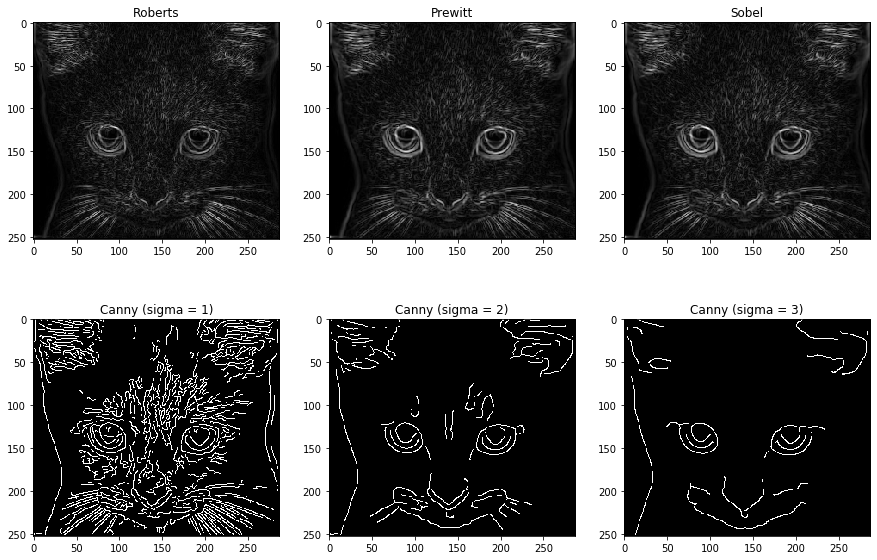

In [43]:
# Your solution here

# In the case of the cat, the edge detection seems to work quite well because the contours are clear and there are not
# many shadows. We tested differented values for sigma (in the case of Canny) and with sigma = 2 the results are
# quite good.

from skimage.filters import roberts, prewitt, sobel
from skimage.feature import canny

cat = io.imread('images/cat.jpg')
gs_cat = rgb2gray(cat)

f, ax = plt.subplots(2, 3, figsize=(15, 10))

sb_roberts = roberts(gs_cat)
ax[0][0].set_title('Roberts')
ax[0][0].imshow(sb_roberts, cmap='gray')

sb_prewitt = prewitt(gs_cat)
ax[0][1].set_title('Prewitt')
ax[0][1].imshow(sb_prewitt, cmap='gray')

sb_sobel = sobel(gs_cat)
ax[0][2].set_title('Sobel')
ax[0][2].imshow(sb_sobel, cmap='gray')

sb_canny = canny(gs_cat, sigma=1)
ax[1][0].set_title('Canny (sigma = 1)')
ax[1][0].imshow(sb_canny, cmap='gray')

sb_canny = canny(gs_cat, sigma=2)
ax[1][1].set_title('Canny (sigma = 2)')
ax[1][1].imshow(sb_canny, cmap='gray')

sb_canny = canny(gs_cat, sigma=3)
ax[1][2].set_title('Canny (sigma = 3)')
ax[1][2].imshow(sb_canny, cmap='gray')

plt.show()

<div class = "alert alert-info" style = "background-color:Wheat;border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**Answer**

In general, the methods that we have applied are low-level (based on the gradients and so on), not semantic (unlike deep learning methods like HED). However, these methods don't need training data and are simple. Apart from that, specifically to the methods we have used:
 Roberts:

 Sobel, Prewitt: Although they are fast, they are sensitive to noise.
 Canny: Canny can , but it is not that fast
 and needs to set parameters (sigma).

</div>